In [1]:
!pip install pooch

In [2]:
import cv2
import scipy
import matplotlib.pyplot as plt
from scipy.datasets import face

In [3]:
cv2.__version__

'4.8.1'

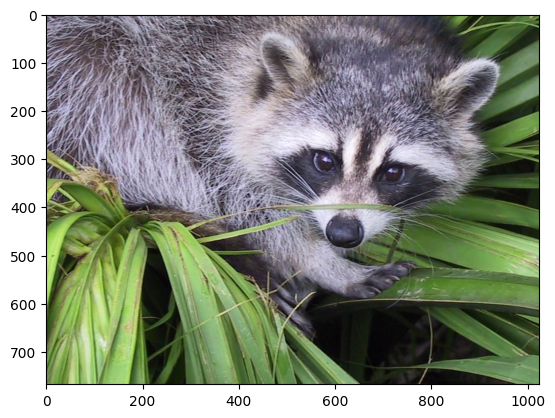

In [4]:
img = face()
plt.imshow(img)

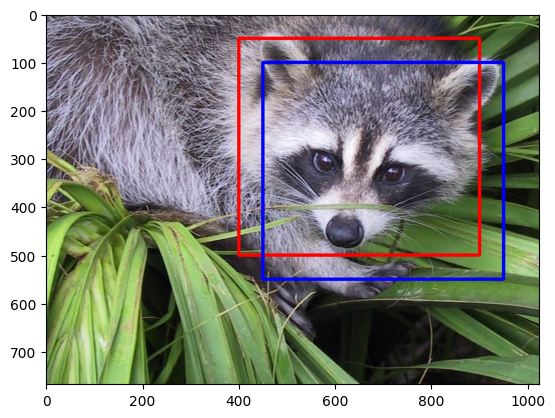

In [8]:
gt = [400,50,900,500] #x_min, y_min, x_max, y_max

start_point, end_point = (gt[0],gt[1]),(gt[2],gt[3])
thickness = 5
image = cv2.rectangle(img, start_point, end_point,color=(255,0,0),thickness=thickness)

pred = [450,100,950,550]
start_point,end_point = (pred[0],pred[1]),(pred[2],pred[3])
image_pred = cv2.rectangle(img, start_point, end_point,color=(0,0,255),thickness=thickness)

plt.imshow(image)
plt.imshow(image_pred)
plt.show();

# IOU metric for checking intersections
# mean average precision -> averaged precision for (TP+FP+FN) в зависимости от порога обнаружения





In [ ]:
# RegionProposal + RCNN

(20271, 4)


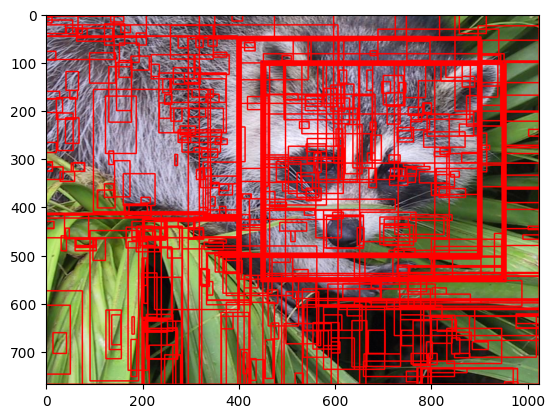

In [11]:
# Selective search. Sequential averaging of the metric equivalent objects
select_seg = cv2.ximgproc.segmentation.createSelectiveSearchSegmentation()

select_seg.setBaseImage(img)
select_seg.switchToSelectiveSearchQuality()
rects = select_seg.process()
print(rects.shape)

img_copy = img.copy()


for i,rect in enumerate(rects):
    if i<500:
        x,y,w,h = rect
        cv2.rectangle(img_copy,(x,y),(x+w,y+h),(255,0,0),2)
    
plt.imshow(img_copy)

In [12]:
# https://www.kaggle.com/code/aruchomu/yolo-v3-object-detection-in-tensorflow
# https://habr.com/ru/articles/556404/